In [1]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import time
from lmfit import Parameter, Parameters, Minimizer
from lsst.obs.lsst import LsstCamMapper as camMapper
from lsst.obs.lsst.cameraTransforms import LsstCameraTransforms

from itertools import product

from mixcoatl.gridFitTask import GridFitTask, DistortedGrid
from mixcoatl.sourcegrid import coordinate_distances, fit_error


camera = camMapper._makeCamera()
lct = LsstCameraTransforms(camera)

## Test Partial Fit (Example 1)

2012.5294399815145 -75.844333749112 -0.05388294599953677
[[ 2.01232668e-09 -1.35373454e-06  6.55628075e-08]
 [-1.35373454e-06  1.50074938e-03  6.22215349e-05]
 [ 6.55628075e-08  6.22215349e-05  9.78222022e-04]]


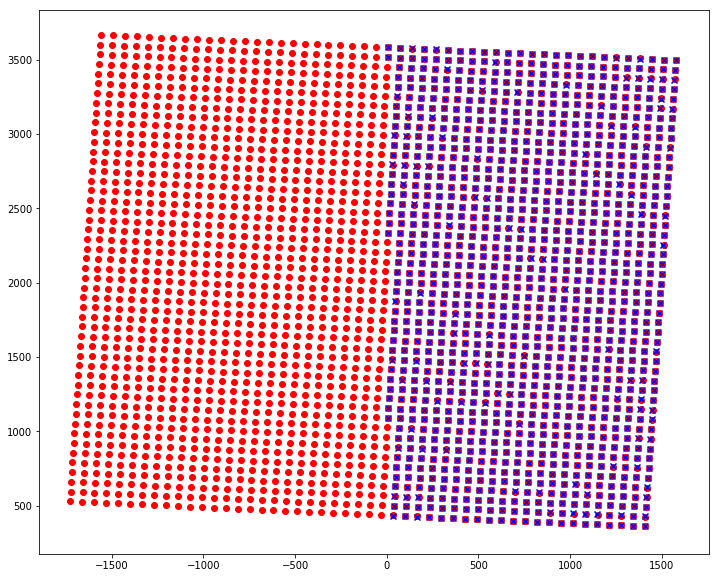

In [2]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-41.4_-233.1_017/*.cat')
infile0 = infiles[0]
y0_guess, x0_guess = (2000., -80)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.covar)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-41.4_-233.1_017/R20_S02_source_catalog.cat
2011.7353774737744 4161.706231403611 -0.05486848581944117
[[2.72949320e-10 2.23774188e-07 6.33595325e-08]
 [2.23774188e-07 3.86427364e-04 3.09213754e-05]
 [6.33595325e-08 3.09213754e-05 3.38268020e-04]]


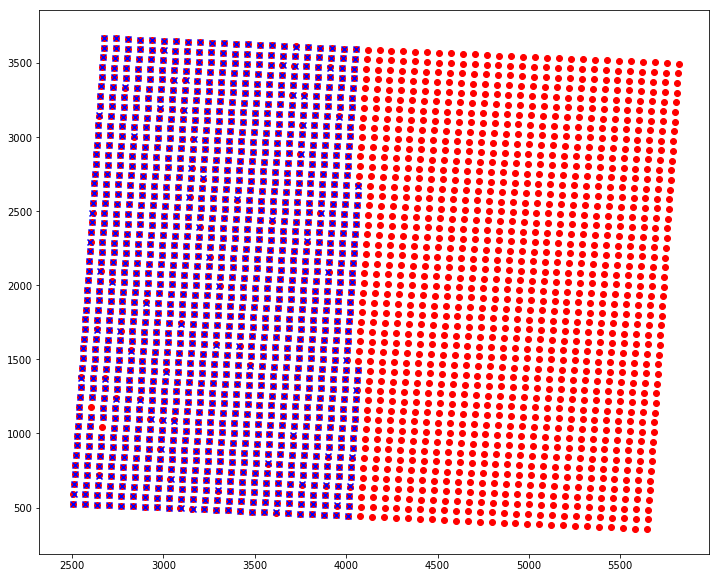

In [3]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (2020, 4170)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.) \
    * (src1['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src1['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src1['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src1['base_SdssCentroid_X'] > x0_guess-70*25)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result1.covar)

## Test Partial Fit (Example 2)

4119.299386596418 2064.398919160342 -0.05425361039908663
[[ 4.48064197e-09 -1.35983423e-06 -3.12173419e-06]
 [-1.35983423e-06  3.24005734e-03  1.02703397e-03]
 [-3.12173419e-06  1.02703397e-03  3.44697659e-03]]


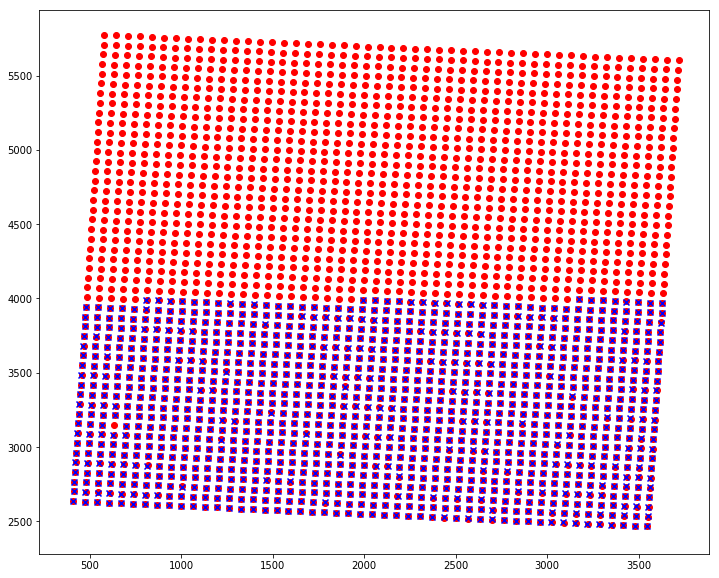

In [4]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/*.cat')
infile0 = infiles[0]
y0_guess, x0_guess = (4100, 2050)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.covar)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/R20_S12_source_catalog.cat
-106.91185346189643 2059.3397470664145 -0.05435839918389483
[[ 2.53789878e-09  3.98733968e-08  1.96321366e-06]
 [ 3.98733968e-08  2.50152129e-03 -3.12205334e-04]
 [ 1.96321366e-06 -3.12205334e-04  2.49941476e-03]]


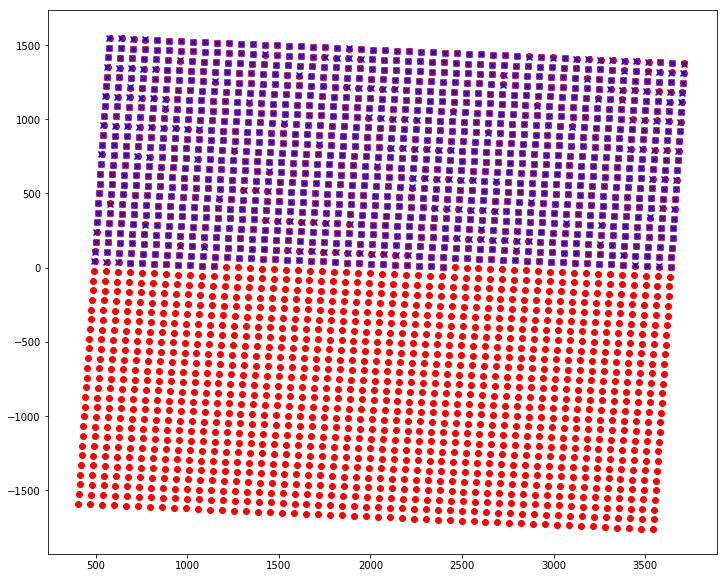

In [5]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (-100, 2050)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.) \
    * (src1['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src1['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src1['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src1['base_SdssCentroid_X'] > x0_guess-70*25)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result1.covar)

## Test Partial Fit (Example 3)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/R20_S10_source_catalog.cat
4079.51183178741 2023.4969184237282 -0.05276916196495043
[[ 4.76373456e-09  9.82292974e-07 -2.00861506e-06]
 [ 9.82292974e-07  2.38760746e-03 -1.03051953e-04]
 [-2.00861506e-06 -1.03051953e-04  2.42685493e-03]]


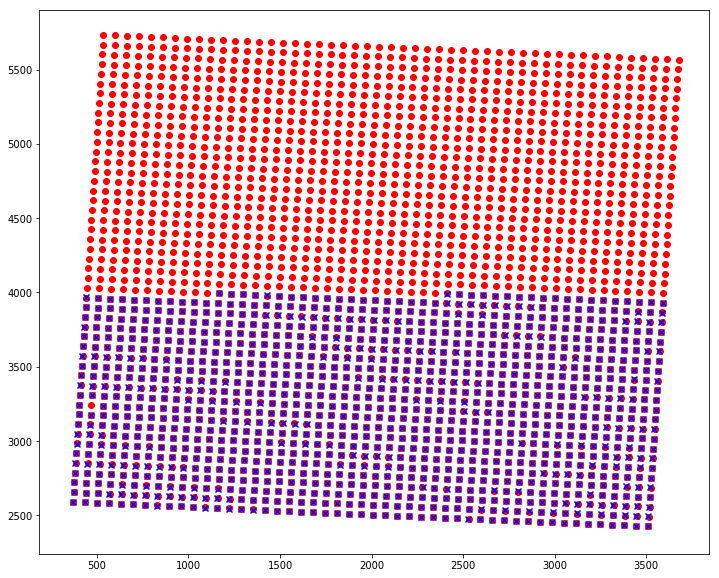

In [12]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/*.cat')
infile0 = infiles[0]
print(infile0)

y0_guess, x0_guess = (4079, 2023)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)


src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (4079, 2023))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.covar)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/R20_S20_source_catalog.cat


/nfs/slac/g/ki/ki19/lsst/snyder18/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/nfs/slac/g/ki/ki19/lsst/snyder18/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


-145.64554127289134 2020.9425684477944 -0.05427385110333537
[[ 3.13573957e-09 -4.66572409e-07  2.23140523e-06]
 [-4.66572409e-07  2.57700208e-03 -5.62584817e-04]
 [ 2.23140523e-06 -5.62584817e-04  2.64604275e-03]]


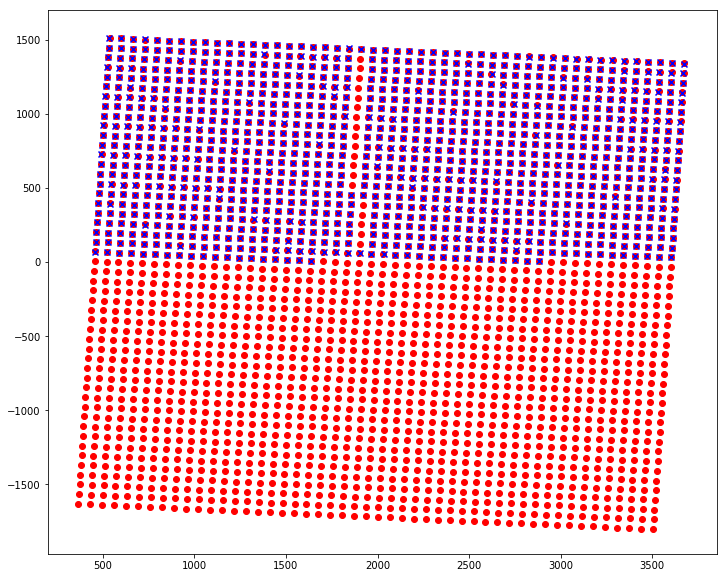

In [11]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (-140, 2030)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result1.covar)

## Make Optic Distortions

In [ ]:
old_infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6865D_dither/raw_data/*.fits')

xstep = np.zeros(len(old_infiles))
ystep = np.zeros(len(old_infiles))
theta = np.zeros(len(old_infiles))

for i, infile in enumerate(old_infiles):

    with fits.open(infile) as hdul:
        ## Read input file
        hdul = fits.open(infile)
        grid_dy = hdul[1].header['DY']
        grid_dx = hdul[1].header['DX']
        grid_theta = hdul[1].header['THETA']
        
        xstep[i] = grid_dx
        ystep[i] = grid_dy
        theta[i] = grid_theta
        
mean_xstep = np.mean(xstep)
mean_ystep = np.mean(ystep)
mean_theta = np.mean(theta)

print(mean_xstep, mean_ystep, mean_theta)

In [ ]:
## Get old optic distortion file
hdul = fits.open('corrected_grid_pt_average_displacement.fits')

dx = hdul[0].data[:, 0]
dy = hdul[0].data[:, 1]

centroid_shifts = (dy, dx)

optics_grid = DistortedGrid(mean_ystep, mean_xstep, mean_theta, 0, 0, 49, 49)
optics_grid.add_centroid_shifts((dy, dx))
#optics_grid.write_fits('optics_distorted_grid.fits', overwrite=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()

ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)

In [ ]:
## Rotate by 45 degrees
optics_grid.theta += np.pi/4

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)